<a href="https://colab.research.google.com/github/maciejmochocki/MyRepo/blob/main/LAB_11_q_learning_STARTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Uczenie Maszynowe, Laboratoria 11 - Q-Learning**
### - Agent Q-Learning



---


*Aut. skryptu: Agnieszka Łysak, 31.05.2021*

In [20]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4, 3))
from IPython.display import clear_output
from collections import defaultdict

<Figure size 288x216 with 0 Axes>

In [21]:
class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on http://inst.eecs.berkeley.edu/~cs188/sp09/pacman.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value

        !!!Important!!!
        Note: please avoid using self._qValues directly. 
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self,state,action,value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        if len(possible_actions) == 0:
            return 0.0
        else:
            value = np.max([self.get_qvalue(state,i) for i in possible_actions])
        return value

    def update(self, state, action, reward, next_state):
        """
        You should do Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """
        gamma = self.discount
        learning_rate = self.alpha

        new_q_value = (1 - learning_rate) * self.get_qvalue(state, action) + learning_rate*(reward + (gamma*self.get_value(next_state)))
        self.set_qvalue(state, action, new_q_value)

    
    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values). 
        """
        possible_actions = self.get_legal_actions(state)

        if len(possible_actions) == 0:
            return None

        q_values = [self.get_qvalue(state,i) for i in possible_actions]
        best_action = possible_actions[np.argmax(q_values)]

        return best_action

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.  
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.getPolicy).
        
        Note: To pick randomly from a list, use random.choice(list). 
              To pick True or False with a given probablity, generate uniform number in [0, 1]
              and compare it with your probability
        """
        possible_actions = self.get_legal_actions(state)
        action = self.get_best_action(state)

        if len(possible_actions) == 0:
            return None

        epsilon = self.epsilon

        if np.random.random() < self.epsilon:
            chosen_action = random.choice(possible_actions)
        else:
            chosen_action = self.get_best_action(state)

        return chosen_action

In [22]:
# Źródła:
# [1] Yandex Data School, "Q Learning", Github, https://github.com/yandexdataschool/Practical_RL/blob/master/week03_model_free/seminar_qlearning.ipynb

In [23]:
import gym
env = gym.make("Taxi-v3")

n_actions = env.action_space.n

In [24]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99, get_legal_actions=lambda s: range(n_actions))

In [25]:
def q_learning(env, agent, t_max=10**4):

  observation = env.reset()
  total_reward = 0.

  for t in range(t_max):

    action = agent.get_action(observation)

    new_observation, reward, done, info = env.step(action)

    agent.update(observation, action, reward, new_observation)

    observation = new_observation
    total_reward += reward

    if done:
      break

  return total_reward

0.09150808531830731 -272.34


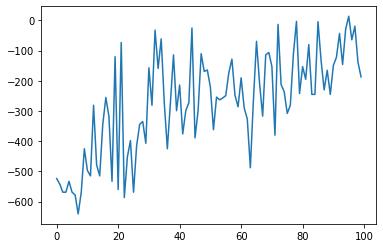

In [26]:
rewards = []

for i in range(100):

  rewards.append(q_learning(env, agent))

  agent.epsilon *= 0.99

  clear_output(True)
  print(agent.epsilon, np.mean(rewards))
  plt.plot(rewards)
  plt.show()

In [27]:
observation = env.reset()
total_reward = 0.

for t in range(200):

  action = agent.get_action(observation)

  new_observation, reward, done, info = env.step(action)

  observation = new_observation

  total_reward += reward
  env.render()

  if done:
    break

  print(t, observation, total_reward, done)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
0 342 -1.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
1 242 -2.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
2 342 -3.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
3 242 -4.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
4 342 -5.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
5 442 -6.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
6 422 -7.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
7 322 -8.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
8 322 -9.0 False
+--

In [30]:
import gym

env = gym.make("Roulette-v0")
n_actions = env.action_space.n

In [31]:
agent = QLearningAgent(alpha=0.1, epsilon=0.05, discount=0.99, get_legal_actions=lambda s: range(n_actions))

In [32]:
def q_learning(env, agent, t_max=10**4):

  observation = env.reset()
  total_reward = 0.

  for t in range(t_max):

    action = agent.get_action(observation)

    new_observation, reward, done, info = env.step(action)

    agent.update(observation, action, reward, new_observation)

    observation = new_observation
    total_reward += reward

    if done:
      break

  return total_reward

0.018301617063661475 0.23


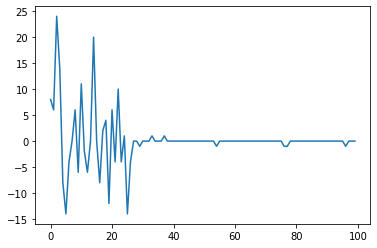

In [33]:
rewards = []

for i in range(100):

  rewards.append(q_learning(env, agent))

  agent.epsilon *= 0.99

  clear_output(True)
  print(agent.epsilon, np.mean(rewards))
  plt.plot(rewards)
  plt.show()